<h1><b>Heart Disease Prediction Using Different Machine Learning Models and Comparison</b></h1>

In the healthcare industry, one of the major challenges for patients is to identify diseases early, before their health risks increase. Using predictive models or forecasting methods has become a captivating and necessary tool for healthcare professionals. However, forecasting heart disease presents unique complexities compared to other medical predictive attempts.Heart disease also known as cardiovascular disease (CVD) also affected by many other factors such as blood vessels, including coronary artery disease, myocarditis, vascular disease, and more. Furthermore, CVD claims the lives of 80% of individuals affected, with three-quarters of these fatalities occurring before the age of 70. CVD can also be affected by the lifestyle of a person Numerous factors can considered for the risk of developing cardiovascular disease, including gender, smoking, age, family history, dietary habits, cholesterol levels, physical activity levels, high blood pressure, weight management, and alcohol consumption.

An efficient and accurate heart disease forecasting model will help patients and healthcare providers take early action before a patient's health gets into a critical stage. Machine Learning techniques used to predict heart disease include the analysis of historical patient data to predict the possibility of having heart disease. This can be done by analyzing data to identify patterns of past information and finding the most suitable predictive model.


<H2><b>Random Forest Algorithm</b></H2>

<h4><b>Libraries</b></h4>

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,confusion_matrix

<h4><b>Load The Data</b></h4>

In [2]:
#Load the Heart disease dataset from the Excel file
dataset = pd.read_csv('heart_2020_cleaned.csv')

<h4><b>View Dataset Details</b></h4>

In [3]:
#Display the number of rows & columns
print("Rows and Columns:",dataset.shape)

Rows and Columns: (319795, 18)


In [4]:
#Display data types of the columns
print("Column List:\n",dataset.columns)

Column List:
 Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [5]:
#Display data types of the columns
print("Data Types:\n",dataset.dtypes)

Data Types:
 HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [22]:
# Display first 5 records
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [7]:
#display the number of null values in the dataset
print(dataset.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [8]:
#Checking the number of unique values in each column
print(dataset.nunique())

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


<h4><b>Data Preprocessing </b></h4>

In [9]:
#Removing duplicates
dataset.drop_duplicates(inplace= True)
print("Dataset shape removing duplicates:", dataset.shape)

Dataset shape removing duplicates: (301717, 18)


In [10]:
#Creating an object list including object datatype
obj_list = dataset.select_dtypes(include='object').columns

In [11]:
#Transform the objects in the columns into numeric values
le = LabelEncoder()
for obj in obj_list:
        dataset[obj] = le.fit_transform(dataset[obj].astype(str))

In [12]:
#view the processed dataset
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


<h4><b>Define X and Y </b></h4>

In [13]:
# Split the data into features and target
X = dataset.drop('HeartDisease', axis=1)
y = dataset['HeartDisease']

<h4><b>Split Data For Traning and Testing </b></h4>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h4><b>Model Traning </b></h4>

In [15]:
# Training the Random Forest model
rfc_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<h4><b>Predicted and Actual Values Comparison </b></h4>

In [16]:
# Predicting the Test set results
y_pred = rfc_classifier.predict(X_test)

In [17]:
#compare the accuracy of predicted data with the actual data
print(f'Training Score: {rfc_classifier.score(X_train, y_train)}')
print(f'Testing Score: {rfc_classifier.score(X_test, y_test)}')

Training Score: 0.9974810725328005
Testing Score: 0.8992443324937027


Comparison of Actual and Predicted values:
        Actual  Predicted
284798       0          0
206219       0          0
298442       0          0
119751       1          0
103309       0          0
232511       0          0
45977        1          0
168666       0          0
189716       0          0
146390       0          0


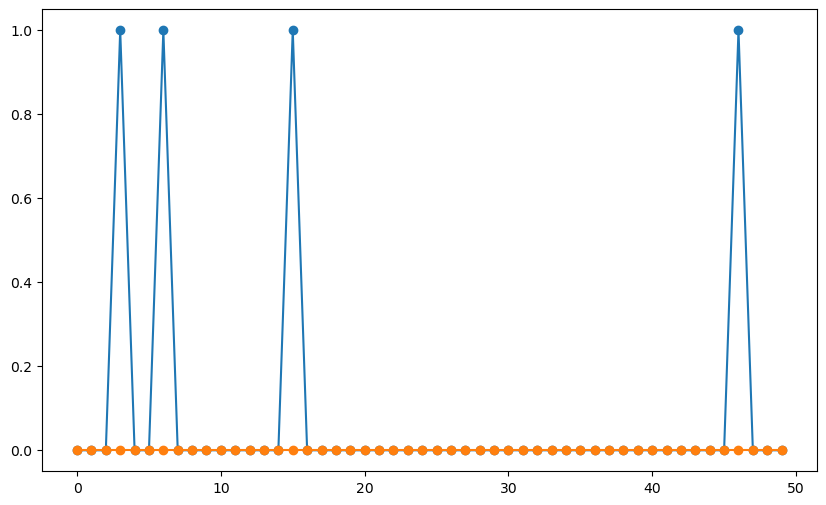

In [18]:
#Create a Dataframe of actual values and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first 10 of the DataFrame
print("Comparison of Actual and Predicted values:")
print(df.head(10))

# Generating a plot for a visual comparison
plt.figure(figsize=(10, 6))
plt.plot(df[:50].reset_index(drop=True), marker='o')


<h4><b>Accuracy and Loss Function Values of the Model </b></h4>

In [19]:
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Precision score: 0.3224181360201511
Recall score: 0.11016844952661994
Accuracy score: 0.8992443324937027
F1 score: 0.16422287390029322
Confusion Matrix: [[80500  1883]
 [ 7237   896]]


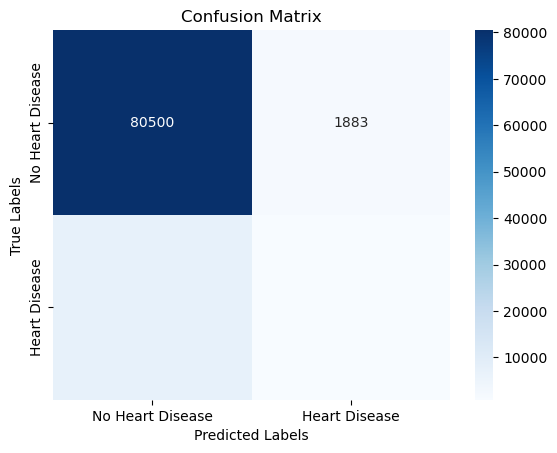

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()